In [11]:
#Walmart Recruiting: Trip Type Classification
#Trip Type Classification of each customers based on thier shopping data
#library import
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

train = pd.read_csv(r'D:\Python\dataset\train.csv')
test = pd.read_csv(r'D:\Python\dataset\test.csv')

In [12]:
print(train.shape)
train.tail()

(647054, 7)


,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
647049,39,191346,Sunday,3.239000e+10,1,PHARMACY OTC,1118.0
647050,39,191346,Sunday,7.874205e+09,1,FROZEN FOODS,1752.0
647051,39,191346,Sunday,4.072000e+03,1,PRODUCE,4170.0
647052,8,191347,Sunday,4.190008e+09,1,DAIRY,1512.0
647053,8,191347,Sunday,3.800060e+09,1,GROCERY DRY GOODS,3600.0


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647054 entries, 0 to 647053
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   TripType               647054 non-null  int64  
 1   VisitNumber            647054 non-null  int64  
 2   Weekday                647054 non-null  object 
 3   Upc                    642925 non-null  float64
 4   ScanCount              647054 non-null  int64  
 5   DepartmentDescription  645693 non-null  object 
 6   FinelineNumber         642925 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 34.6+ MB


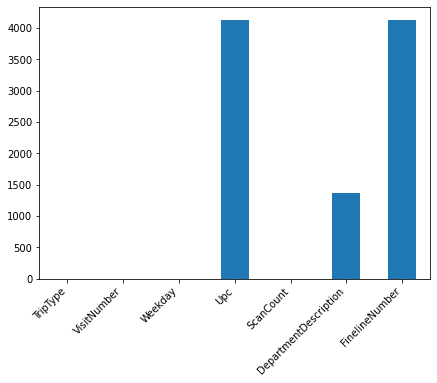

In [14]:
plt.figure(figsize=(7, 5))
train.isnull().sum().plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.show()


In [15]:
#Encode Weekday (Labeling)
wd = {"Monday": 0, "Tuesday": 1, "Wednesday": 2, "Thursday": 3, 
      "Friday": 4, "Saturday": 5, "Sunday": 6}
train["Weekday"] = train["Weekday"].apply(lambda x: wd[x])
test["Weekday"] = test["Weekday"].apply(lambda x: wd[x])

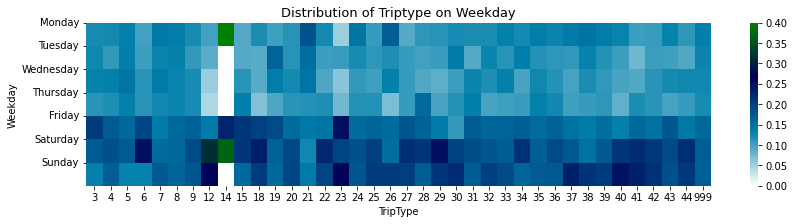

In [16]:
plt.figure(figsize=(14, 3))

sns.heatmap(data=pd.crosstab(train["Weekday"],
                             train["TripType"], 
                             values=train["VisitNumber"],
                             aggfunc='count', 
                             normalize="columns"), cmap="ocean_r")
plt.yticks(range(0,7), list(wd.keys()), rotation="horizontal")
plt.title("Distribution of Triptype on Weekday", fontsize=13)
plt.show()

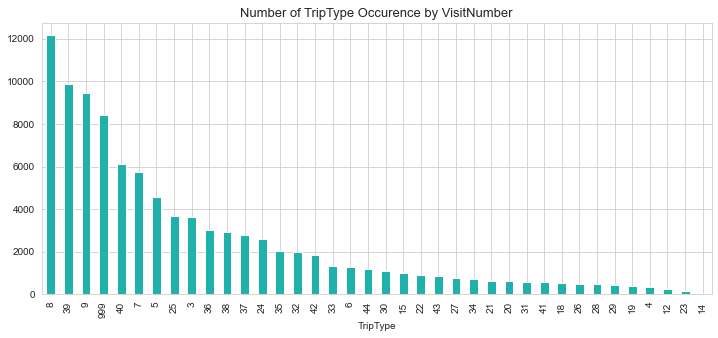

In [17]:
#Distribution trip type
plt.figure(figsize=(12, 5))

sns.set_style('whitegrid')
np.sort(train.TripType.unique())
train_triptypes = train.drop_duplicates("VisitNumber")
a = train_triptypes["TripType"]
a = a.value_counts()
a.plot(kind='bar', color="lightseagreen")
plt.title("Number of TripType Occurence by VisitNumber", fontsize=13)
plt.xlabel("TripType")

plt.show()

In [18]:
train_40 = train[train["TripType"]==40]
train_40["DepartmentDescription"].value_counts()[:10]

GROCERY DRY GOODS           32639
DSD GROCERY                 22157
DAIRY                       17354
PRODUCE                     16704
PERSONAL CARE                9911
FROZEN FOODS                 9307
HOUSEHOLD CHEMICALS/SUPP     8093
COMM BREAD                   5968
HOUSEHOLD PAPER GOODS        5712
PHARMACY OTC                 4569
Name: DepartmentDescription, dtype: int64

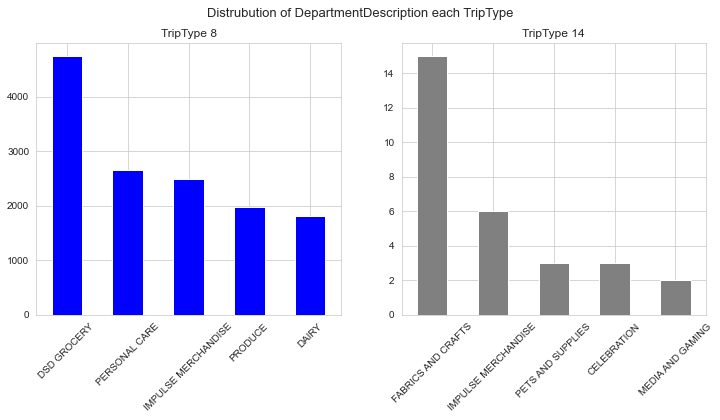

In [20]:
#Most Frequent & Least Frequent TripType
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(121)
type_8 = train[train.TripType == 8]
type_8_items = type_8[["TripType","DepartmentDescription"]]
type_8_items.DepartmentDescription.value_counts().head().plot(kind="bar", rot=45, 
                                        title="TripType 8", color="blue")
ax1 = fig.add_subplot(122)
type_14 = train[train.TripType == 14]
type_14_items = type_14[["TripType","DepartmentDescription"]]
type_14_items.DepartmentDescription.value_counts().head().plot(kind="bar", rot=45, 
                                        title="TripType 14", color="grey")

fig.suptitle("Distrubution of DepartmentDescription each TripType", fontsize=13)
plt.xticks(fontsize=10)
plt.show()

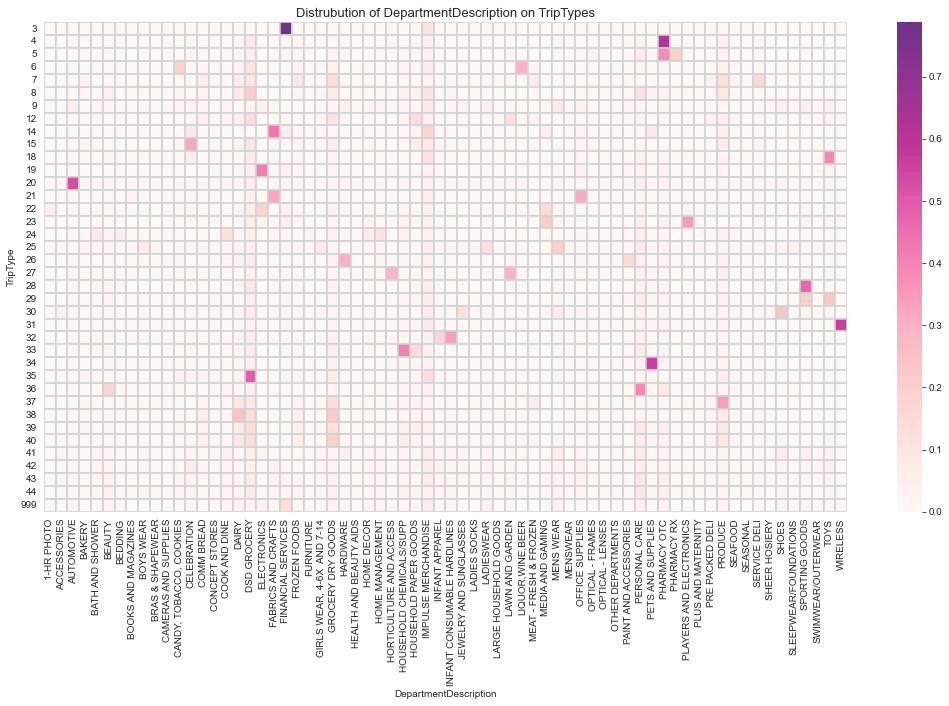

In [21]:
trip_desc = pd.crosstab(train["TripType"], 
                        train["DepartmentDescription"], 
                        values=train["ScanCount"], 
                        aggfunc="count", 
                        normalize="index")

plt.figure(figsize=(18, 9))
sns.heatmap(trip_desc, linecolor="lightgrey", linewidths=0.02, cmap="RdPu", alpha=.8)
plt.title("Distrubution of DepartmentDescription on TripTypes", fontsize=13)
plt.show()

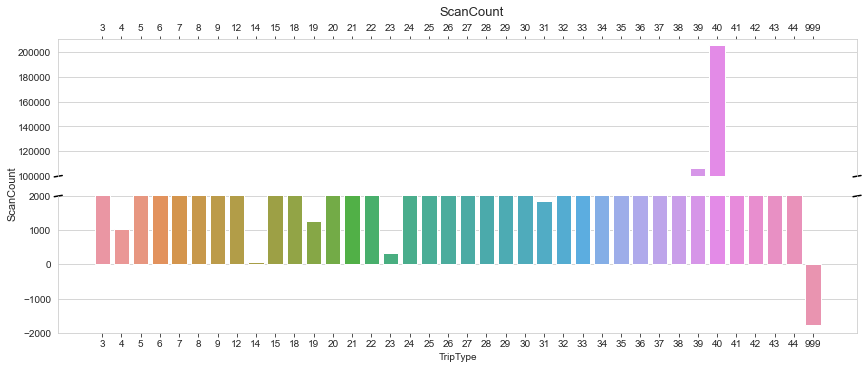

In [22]:
train_plot = train[["TripType", "ScanCount"]]
plot_grouped = train_plot.groupby("TripType", as_index=False).sum()

f, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 5))
sns.barplot(x="TripType", y="ScanCount", data=plot_grouped, ax=ax)
sns.barplot(x="TripType", y="ScanCount", data=plot_grouped, ax=ax2)

ax.set_ylim(100000, 210000)
ax2.set_ylim(-2000, 2000)
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax2.yaxis.label.set_visible(False)

ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off') 
ax2.xaxis.tick_bottom()

d = .005

kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  

kwargs.update(transform=ax2.transAxes) 
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs) 

f.text(0, 0.5, 'ScanCount', va='center', rotation='vertical', fontsize=11)
f.text(0.5, 1, 'ScanCount', va='center', rotation='horizontal', fontsize=13)
plt.tight_layout()
plt.show()